In [23]:
##copied from a note i left in the back stars section
## Haven't got to it yet but i have clustered the stars in this galaxy and will find all the distances soon
## I've done this and the top image so if its cool im gonna leave the other views to you guys
import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt

import os 

import pandas as pd # pandas is a popular library in industry for manipulating large data tables

# configure notebook for plotting
%matplotlib inline 
#mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme

# define default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 

import warnings
warnings.filterwarnings('ignore')

In [24]:
#BOTTOM
ddir = '/Users/eleanor/Downloads/universe_2/'
bottomstars = pd.read_csv(ddir+'Bottom/Star_Data.csv') 
#print(bottomstars.keys())

In [25]:
ddir_stars = '/Users/eleanor/Downloads/universe_2/'
variables = ddir_stars + '/Variable_Star_Data/'
print(variables)

/Users/eleanor/Downloads/universe_2//Variable_Star_Data/


Text(0.5, 1.0, 'Bottom')

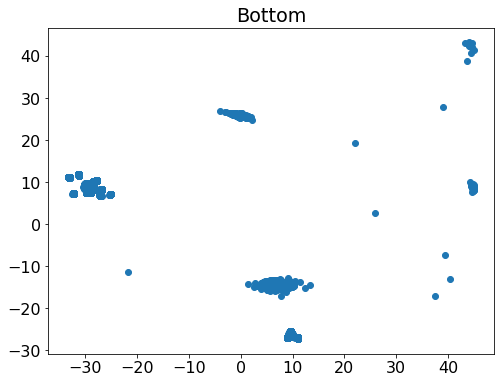

In [26]:
XB=bottomstars.X
YB=bottomstars.Y

CB=np.array(list(zip(bottomstars.X,bottomstars.Y)))
plt.scatter(CB[:,0], CB[:,1])
plt.title('Bottom')

Text(0.5, 1.0, 'Bottom Including Distant Star Data')

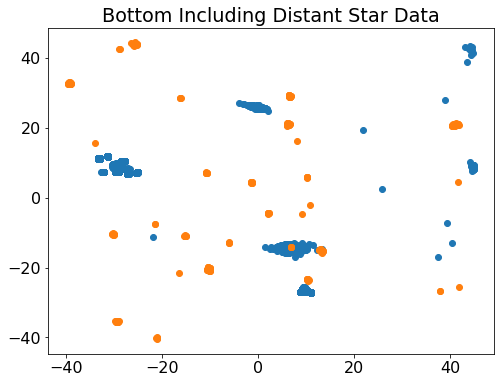

In [27]:
ddir = '/Users/eleanor/Downloads/universe_2/'
distantB = pd.read_csv(ddir+'Bottom/Distant_Galaxy_Data.csv') 

plt.scatter(CB[:,0], CB[:,1])
plt.scatter(distantB.X, distantB.Y)
plt.title('Bottom Including Distant Star Data')

In [28]:
from sklearn.cluster import KMeans
import math

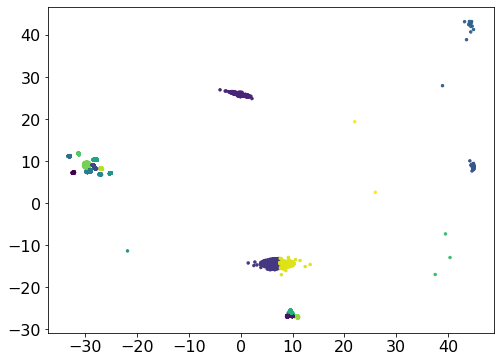

In [29]:
kmeans=KMeans(n_clusters=20)
kmeans.fit(CB)
plt.scatter(CB[:,0], CB[:,1],s=6, c=kmeans.labels_)

In [30]:
xb = kmeans.cluster_centers_ # This

In [31]:
kmeans.labels_

array([15, 15, 15, ..., 13, 19, 19], dtype=int32)

In [32]:
xb

array([[-32.27437828,   7.28564368],
       [  9.49411666, -26.80038703],
       [ -0.1908594 ,  25.86743985],
       [  6.21179036, -14.35262926],
       [-28.30743698,   8.62799182],
       [ 44.80298   ,   8.66032889],
       [ 43.79152308,  40.96985385],
       [-33.10951051,  11.1747334 ],
       [-29.26305208,   7.56068464],
       [-27.11128146,   6.85576685],
       [-25.18640696,   7.07678518],
       [-28.04827114,  10.35658308],
       [  9.66189839, -25.9540321 ],
       [ 39.11393333, -12.3963    ],
       [-31.28251018,  11.73160519],
       [-29.60634515,   8.98371267],
       [ 10.76941671, -26.96794712],
       [-26.91410193,   8.21255687],
       [  8.87206143, -14.32976906],
       [ 23.9636    ,  10.96485   ]])

In [33]:
#Top
ddir = '/Users/eleanor/Downloads/universe_2/'
topstars = pd.read_csv(ddir+'Top/Star_Data.csv') 

Text(0.5, 1.0, 'Top')

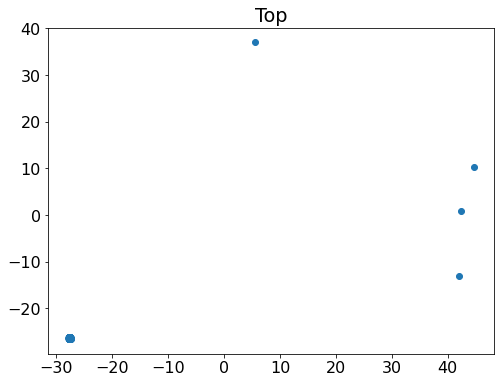

In [34]:
XT=topstars.X
YT=topstars.Y

CT=np.array(list(zip(topstars.X,topstars.Y)))
plt.scatter(CT[:,0], CT[:,1]) #centre of this one is (-27.7,-26.5)
centre=(-27.7,-26.5)
plt.title("Top")

Text(0.5, 1.0, 'Top Including Distant Star Data')

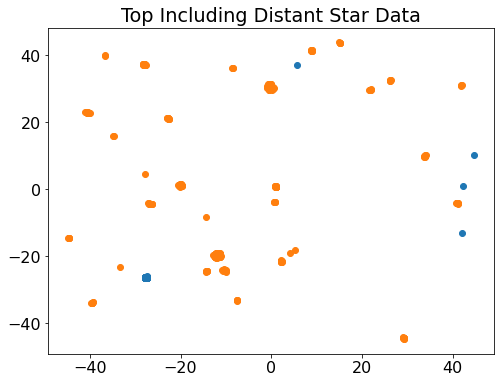

In [35]:
ddir = '/Users/eleanor/Downloads/universe_2/'
distantT = pd.read_csv(ddir+'Top/Distant_Galaxy_Data.csv') 

plt.scatter(CT[:,0], CT[:,1])
plt.scatter(distantT.X, distantT.Y)
plt.title('Top Including Distant Star Data')

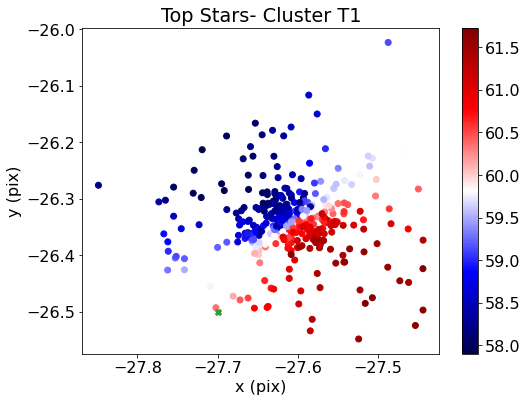

In [36]:
d = np.sqrt((topstars.X-centre[0])** 2 + (topstars.Y - centre[1])**2)
galaxyt1 = topstars[d<1] # filter to only close ones
plt.scatter(galaxyt1.X,galaxyt1.Y,c=galaxyt1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster T1');

19952.62314968879

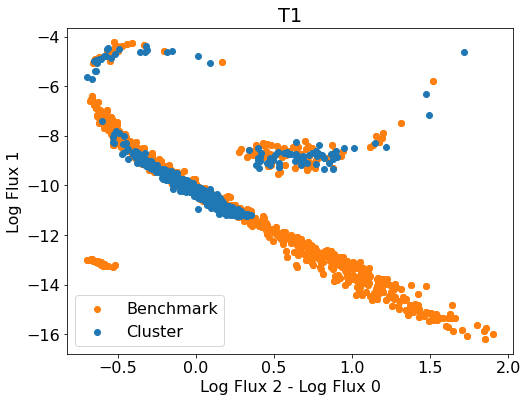

In [37]:
m0, m1, m2 = (np.log10(galaxyt1['BlueF']), 
              np.log10(galaxyt1['GreenF']), 
              np.log10(galaxyt1['RedF'])) 
colour = m2-m0

#st1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])


plt.title('T1')
10**(8.6/2)

In [38]:
#vargalaxy = galaxyt1[galaxyt1['Variable?']==1] THIS searches through a defined galaxy and pulls all variable stars
#print(vargalaxy) prints all variables in galaxy
# galaxyt1.iloc[[24]] #select one star and print its information

In [39]:
#Right
ddir = '/Users/eleanor/Downloads/universe_2/'
rightstars = pd.read_csv(ddir+'Right/Star_Data.csv') 

Text(0.5, 1.0, 'Right')

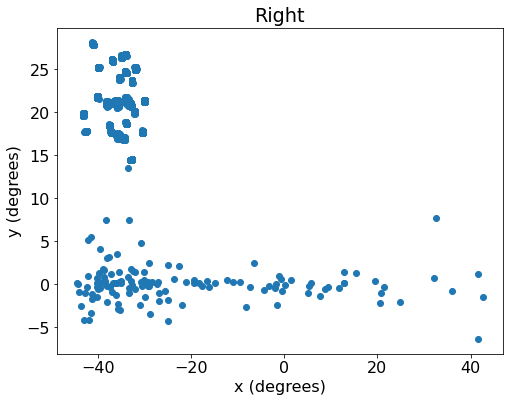

In [40]:
XR=rightstars.X
YR=rightstars.Y

CR=np.array(list(zip(rightstars.X,rightstars.Y)))
plt.scatter(CR[:,0], CR[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Right')

Text(0.5, 1.0, 'Right Including Distant Star Data')

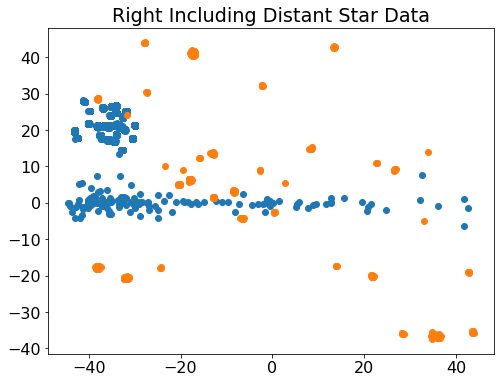

In [41]:
ddir = '/Users/eleanor/Downloads/universe_2/'
distantR = pd.read_csv(ddir+'Right/Distant_Galaxy_Data.csv') 

plt.scatter(CR[:,0], CR[:,1])
plt.scatter(distantR.X, distantR.Y)
plt.title('Right Including Distant Star Data')

array([[-34.4441052 ,  24.45057324],
       [-34.64141524,  17.70572898],
       [-43.07699318,  19.72556013],
       [-29.93993916,  21.30469491],
       [  2.00157692,  -0.13252308],
       [-36.89233287,  26.06034188],
       [-25.09570857,  -0.1177    ],
       [-38.12126207,   0.21407931],
       [-37.30176023,  18.05313744],
       [-36.67475787,  21.0755905 ],
       [-33.00350538,  20.80898244],
       [-39.82382889,  25.18891709],
       [-32.16457647,  24.54065275],
       [-30.46265895,  17.70673729],
       [-32.81452812,  14.43943056],
       [ 30.34870909,  -0.42380909],
       [-41.07492727,  27.9616048 ],
       [-40.02721245,  21.75726285],
       [-42.56652526,  17.75448185],
       [-34.43785384,  26.58364298]])

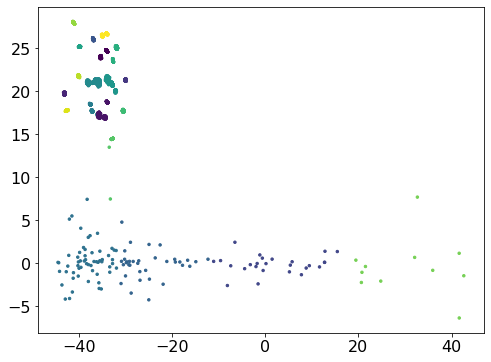

In [42]:
kmeans=KMeans(n_clusters=20)
kmeans.fit(CR)
plt.scatter(CR[:,0], CR[:,1],s=6, c=kmeans.labels_)
xr = kmeans.cluster_centers_
xr

array([[-3.68923329e+01,  2.60603419e+01],
       [-3.73030995e+01,  1.80540275e+01],
       [-3.04626589e+01,  1.77067373e+01],
       [ 9.81236364e+00, -7.63818182e-02],
       [-4.25665253e+01,  1.77544818e+01],
       [-3.26422437e+01,  2.35898917e+01],
       [-3.64174335e+01,  2.10913047e+01],
       [-1.76027167e+01,  9.24583333e-02],
       [-2.94885606e+01, -3.52030303e-02],
       [-3.28985291e+01,  2.08153896e+01],
       [-4.10749273e+01,  2.79616048e+01],
       [-3.28145281e+01,  1.44394306e+01],
       [-4.00272124e+01,  2.17572629e+01],
       [-3.44378538e+01,  2.65836430e+01],
       [-2.99399392e+01,  2.13046949e+01],
       [-3.39194464e+01,  1.87433057e+01],
       [ 3.77694667e+01,  1.33633333e-01],
       [-3.91036551e+01,  1.74534694e-01],
       [-3.98238289e+01,  2.51889171e+01],
       [-3.40109822e+01,  2.46974228e+01],
       [-4.30769932e+01,  1.97255601e+01],
       [-3.18962483e+01,  2.50747399e+01],
       [-3.56474458e+01,  1.72365810e+01],
       [-3.

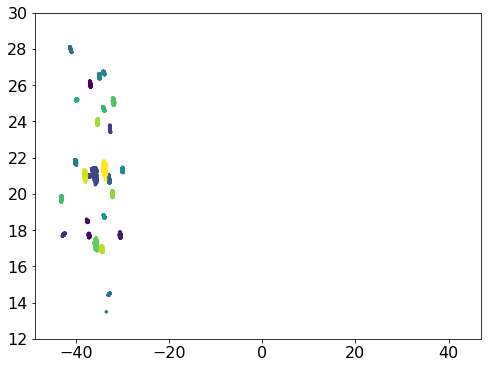

In [43]:
#stars on bottom look like individual, get rid of them to cluster
kmeans=KMeans(n_clusters=30)
kmeans.fit(CR)
plt.scatter(CR[:,0], CR[:,1],s=6, c=kmeans.labels_)
plt.ylim((12,30))
xr = kmeans.cluster_centers_
xr

Text(0.5, 1.0, 'Left')

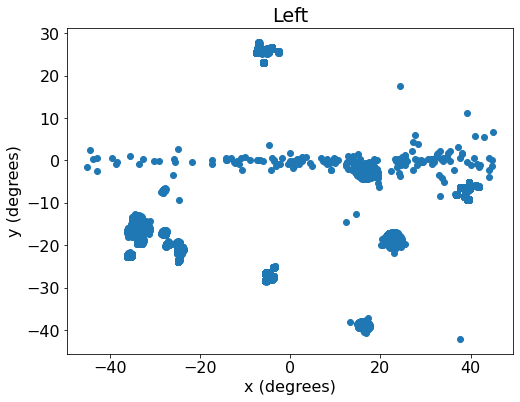

In [44]:
#Left
ddir = '/Users/eleanor/Downloads/universe_2/'
leftstars = pd.read_csv(ddir+'Left/Star_Data.csv') 
XL=rightstars.X
YL=rightstars.Y

CL=np.array(list(zip(leftstars.X,leftstars.Y)))
plt.scatter(CL[:,0], CL[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Left')

Text(0.5, 1.0, 'Right Including Distant Star Data')

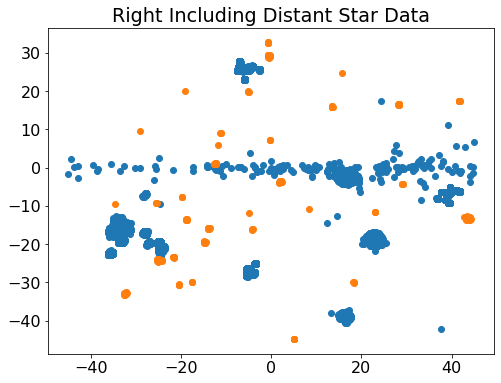

In [137]:
ddir = '/Users/eleanor/Downloads/universe_2/'
distantL = pd.read_csv(ddir+'Left/Distant_Galaxy_Data.csv') 

plt.scatter(CL[:,0], CL[:,1])
plt.scatter(distantL.X, distantL.Y)
plt.title('Right Including Distant Star Data')

array([[ -7.38746722,  25.84212537],
       [-27.93409667, -17.0363878 ],
       [ 39.16739922,  -6.64947317],
       [ -3.60029394, -25.14819329],
       [ 16.65506985,  -2.49333137],
       [ 16.27581863, -38.88327001],
       [ 22.69950279, -18.69796356],
       [-34.99553703, -16.50140859],
       [-24.40038624, -21.01031006],
       [-28.02912647,  -7.06244516],
       [-35.60334033, -22.39531405],
       [ -4.74183934,  26.08648504],
       [ -5.31162253, -28.21324668],
       [ -1.08432593,  -0.0711963 ],
       [-33.24134476, -19.04002889],
       [-34.2267328 , -13.97532273],
       [ -5.9403984 ,  23.13115737],
       [-32.9079284 , -16.01370012],
       [ 39.65073402,  -4.91407608],
       [ 39.04371271,  -8.85313058],
       [-27.18966131, -19.79154101],
       [ 41.36576162,  -6.06484242],
       [-24.6694014 , -23.47164269],
       [ -2.62170615,  25.56926821],
       [-39.71806364,  -0.08077273],
       [ 28.52268936,   0.95903404],
       [ -4.99387973, -26.71184957],
 

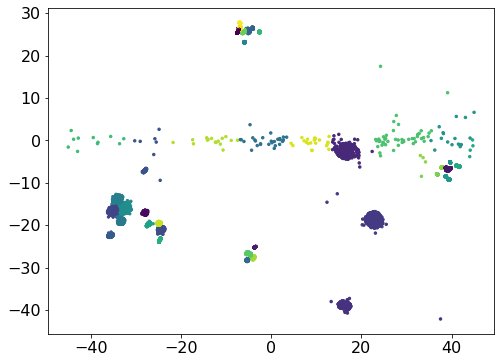

In [45]:
kmeans=KMeans(n_clusters=36)
kmeans.fit(CL)
plt.scatter(CL[:,0], CL[:,1],s=6, c=kmeans.labels_)
xl = kmeans.cluster_centers_
xl

Text(0.5, 1.0, 'Front')

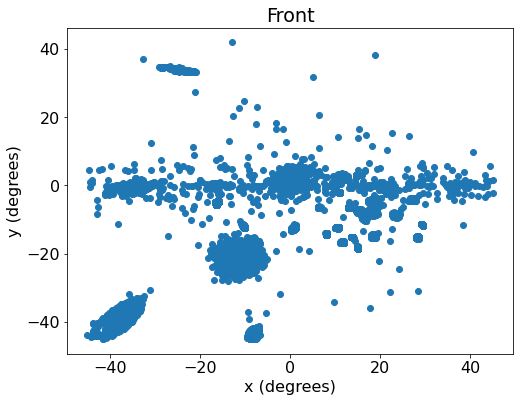

In [46]:
#Front
ddir = '/Users/eleanor/Downloads/universe_2/'
frontstars = pd.read_csv(ddir+'Front/Star_Data.csv') 
XF=frontstars.X
YF=frontstars.Y

CF=np.array(list(zip(frontstars.X,frontstars.Y)))
plt.scatter(CF[:,0], CF[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Front')

Text(0.5, 1.0, 'Front Including Distant Star Data')

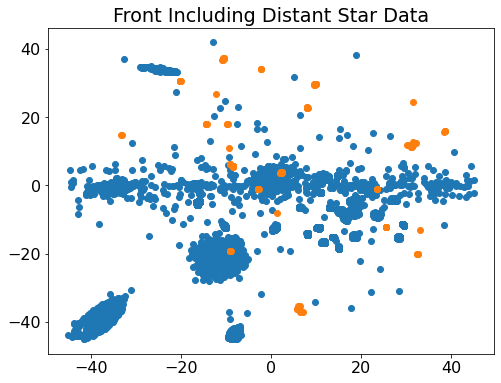

In [138]:
ddir = '/Users/eleanor/Downloads/universe_2/'
distantF = pd.read_csv(ddir+'Front/Distant_Galaxy_Data.csv') 

plt.scatter(CF[:,0], CF[:,1])
plt.scatter(distantF.X, distantF.Y)
plt.title('Front Including Distant Star Data')

array([[  0.80429641, -12.51456459],
       [ 27.39007569,  -3.87947451],
       [-37.88745448, -38.98062688],
       [-24.92902417,  33.94255564],
       [-35.12068182,  -0.68912874],
       [ -8.17822995, -43.41380792],
       [ 18.80689616,  -5.04415456],
       [ 12.89320306, -15.8336857 ],
       [-16.34304551,  -4.97597509],
       [-10.55150525, -20.22034022],
       [  0.06017968,   2.00958835],
       [ 10.91432593,  -2.0484425 ],
       [ 29.31678674, -11.56881882],
       [-10.3264993 , -11.9978378 ],
       [ 23.47184846,  -8.66840805],
       [ 21.07885895,  -0.57585786],
       [ 14.87282378,   2.92745056],
       [ 16.62343694,  -9.97873221],
       [  8.03036244, -14.22906182],
       [ 14.18003028,  -6.98415521],
       [  6.49279607,  -6.41994747],
       [ 10.45531629, -12.38422236],
       [ 15.04341914, -18.44825598],
       [ 18.50797086, -14.93568637],
       [ 28.2862198 , -15.31599171],
       [ 11.63341544,   2.40318522],
       [ 38.63130909,   0.31399091],
 

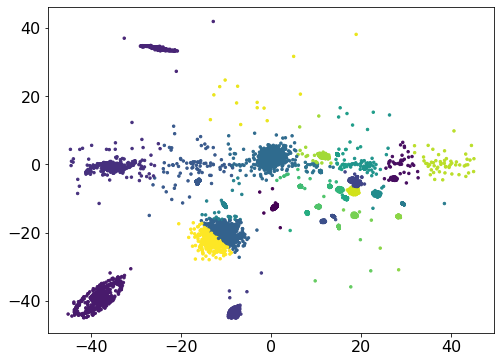

In [47]:
kmeans=KMeans(n_clusters=30)
kmeans.fit(CF)
plt.scatter(CF[:,0], CF[:,1],s=6, c=kmeans.labels_)
xf = kmeans.cluster_centers_
xf

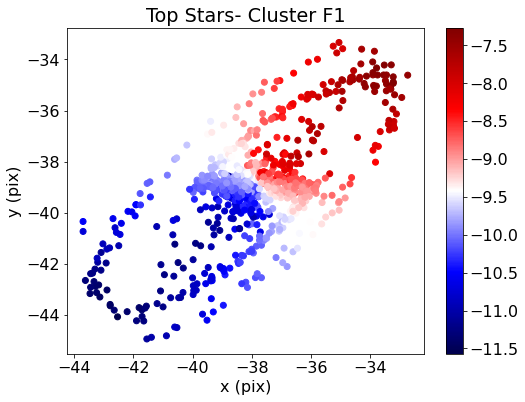

In [48]:
centre = (-37.88745448, -38.98062688)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf1 = frontstars[d<7] # filter to only close ones
plt.scatter(galaxyf1.X,galaxyf1.Y,c=galaxyf1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
#plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F1');

Text(0.5, 1.0, 'F1')

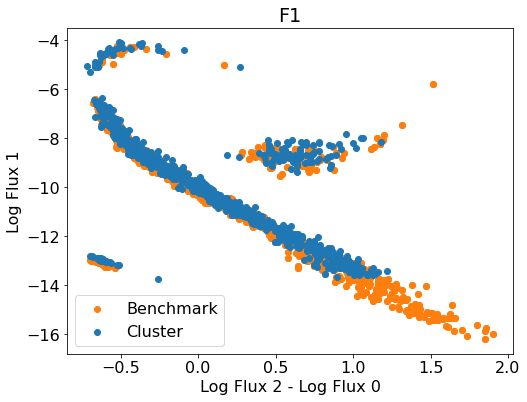

In [49]:
m0, m1, m2 = (np.log10(galaxyf1['BlueF']), 
              np.log10(galaxyf1['GreenF']), 
              np.log10(galaxyf1['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
10**(6/2)
plt.title('F1')

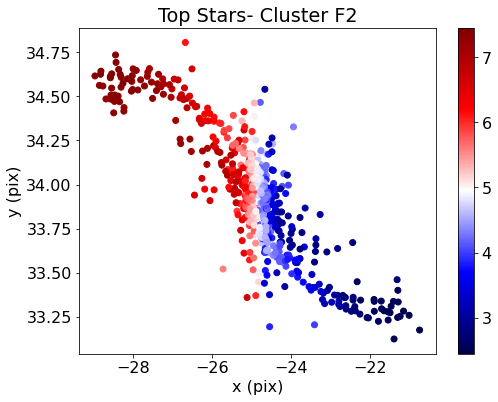

In [50]:
centre = (-24.83723476,  33.87115245)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf2 = frontstars[d<7] # filter to only close ones
plt.scatter(galaxyf2.X,galaxyf2.Y,c=galaxyf2.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
#plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F2');

Text(0.5, 1.0, 'F2')

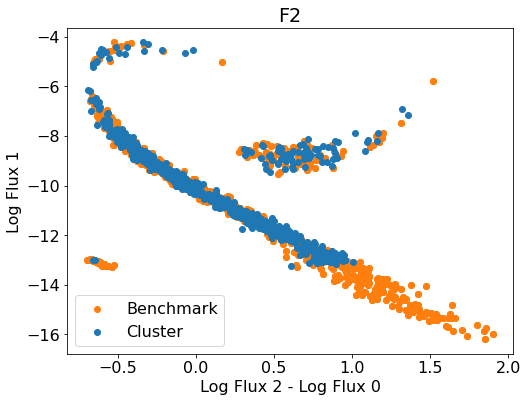

In [51]:
m0, m1, m2 = (np.log10(galaxyf2['BlueF']), 
              np.log10(galaxyf2['GreenF']), 
              np.log10(galaxyf2['RedF'])) 
colour = m2-m0

#sf2 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+6.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
10**(6.5/2)
plt.title("F2")

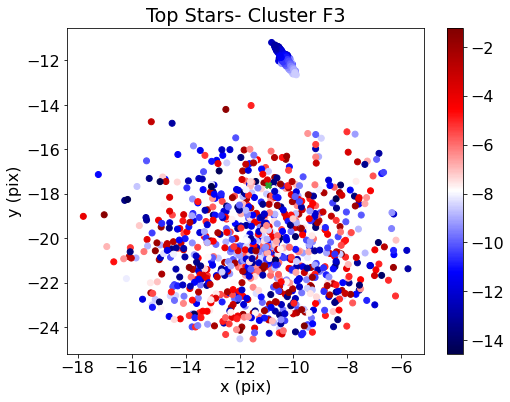

In [52]:
centre = (-10.94783942, -17.60958602)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf3 = frontstars[d<7] # filter to only close ones
plt.scatter(galaxyf3.X,galaxyf3.Y,c=galaxyf3.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F3');

3162.2776601683795

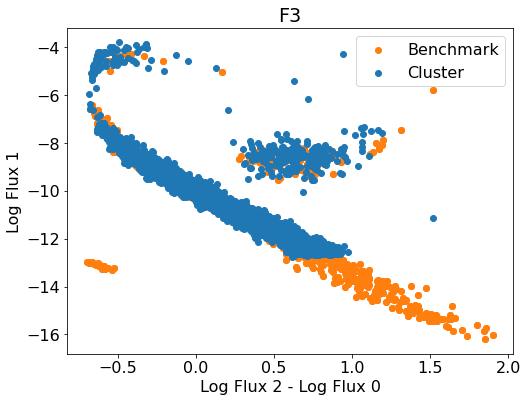

In [53]:
m0, m1, m2 = (np.log10(galaxyf3['BlueF']), 
              np.log10(galaxyf3['GreenF']), 
              np.log10(galaxyf3['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title("F3")
10**(7/2)

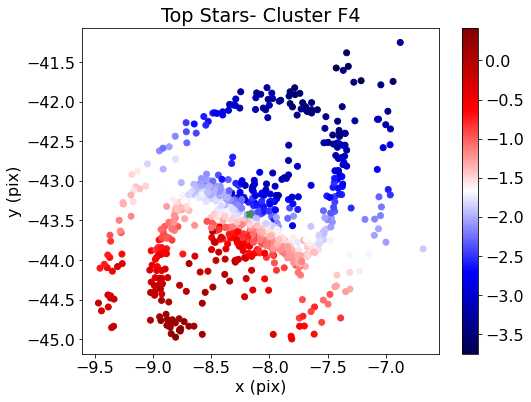

In [54]:
centre = (-8.17822995, -43.41380792)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf4 = frontstars[d<4] # filter to only close ones
plt.scatter(galaxyf4.X,galaxyf4.Y,c=galaxyf4.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F4');

3162.2776601683795

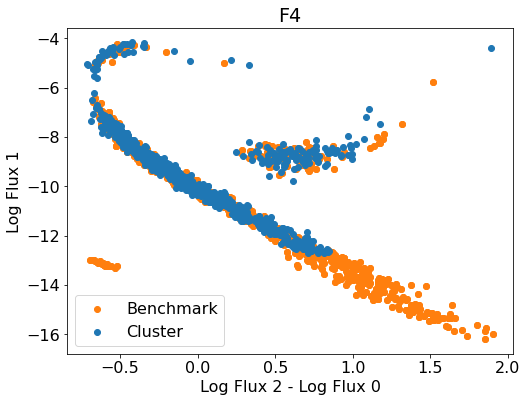

In [55]:
m0, m1, m2 = (np.log10(galaxyf4['BlueF']), 
              np.log10(galaxyf4['GreenF']), 
              np.log10(galaxyf4['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('F4')
10**(7/2)

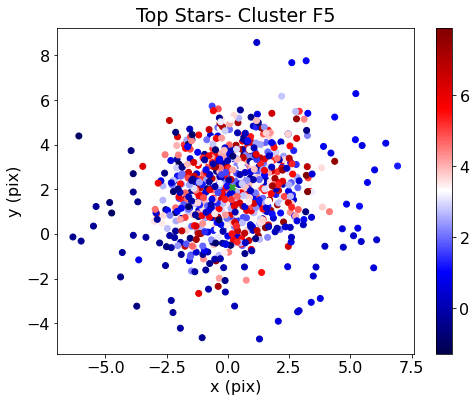

In [56]:
centre = (0.16062933,   2.11029051)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf5 = frontstars[d<7] # filter to only close ones
plt.scatter(galaxyf5.X,galaxyf5.Y,c=galaxyf5.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F5');
#galaxyf5

1778.2794100389228

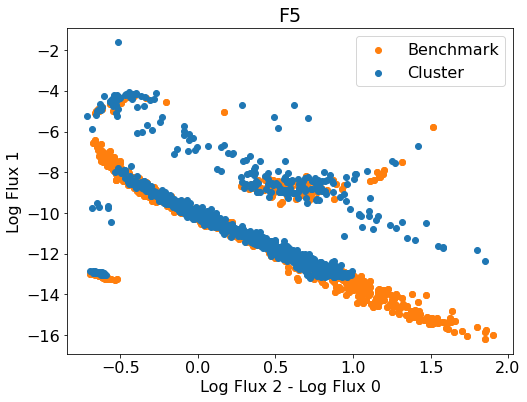

In [57]:
m0, m1, m2 = (np.log10(galaxyf5['BlueF']), 
              np.log10(galaxyf5['GreenF']), 
              np.log10(galaxyf5['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+6.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('F5')
10**(6.5/2)

Text(0.5, 1.0, 'Back')

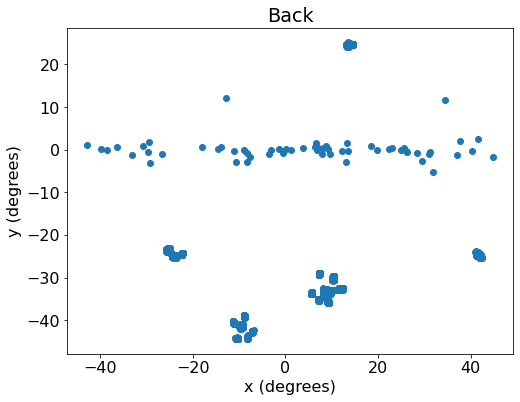

In [58]:
#Back
## Haven't got to it yet but i have clustered the stars in this galaxy and will find all the distances soon
## I've done this and the top image so if its cool im gonna leave the other views to you guys
ddir = '/Users/eleanor/Downloads/universe_2/'
backstars = pd.read_csv(ddir+'Back/Star_Data.csv') 
#XBA=backstars.X[backstars.Y<-10&backstars.Y>19]
XBA=backstars.X
YBA=backstars.Y

CBA=np.array(list(zip(backstars.X,backstars.Y)))
plt.scatter(CBA[:,0], CBA[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Back')

Text(0.5, 1.0, 'Back Including Distant Star Data')

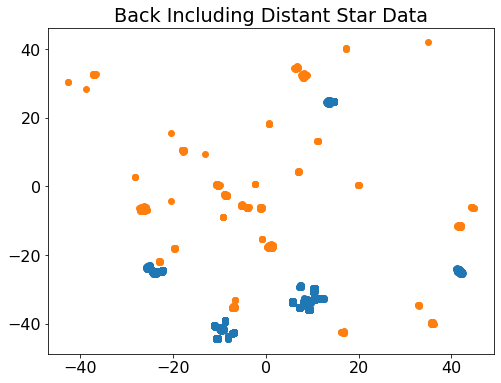

In [139]:
ddir = '/Users/eleanor/Downloads/universe_2/'
distantBA = pd.read_csv(ddir+'Back/Distant_Galaxy_Data.csv') 

plt.scatter(CBA[:,0], CBA[:,1])
plt.scatter(distantBA.X, distantBA.Y)
plt.title('Back Including Distant Star Data')

(13645,) (13645,)


Text(0.5, 1.0, 'Back-Reduced')

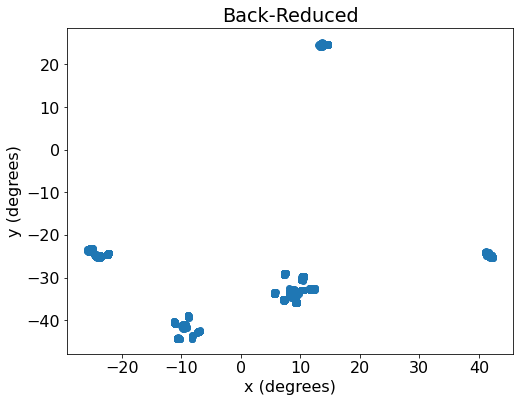

In [59]:
XBA=backstars.X[(backstars.Y<-10)|(backstars.Y>19)]
YBA=backstars.Y[(backstars.Y<-10)|(backstars.Y>19)]
# XBA=backstars.X[(backstars.Y>19)]
# YBA=backstars.Y[(backstars.Y>19)]
print(np.shape(YBA), np.shape(XBA))
CBA=np.array(list(zip(XBA,YBA)))
plt.scatter(CBA[:,0], CBA[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Back-Reduced')

array([[ 10.37419578, -32.92942329],
       [ 14.52497384,  24.71534616],
       [-22.32923073, -24.51114134],
       [ -8.14270442, -43.96367691],
       [ 41.65401492, -24.66319513],
       [  7.23939239, -35.28150299],
       [-11.13208013, -40.58794292],
       [ 10.42071839, -29.80672286],
       [-25.29921244, -23.51684139],
       [  7.38684234, -29.09425255],
       [ -9.51475882, -41.44602602],
       [-10.51791533, -44.26506245],
       [-24.42321423, -24.76371036],
       [  5.71196328, -33.68406677],
       [  8.76339623, -33.63173543],
       [ 12.25934408, -32.65742111],
       [ -8.79838502, -39.13926435],
       [ -7.08522101, -42.68815294],
       [  9.26548462, -35.81633573],
       [ 13.56565183,  24.58746981],
       [ 10.28218743, -30.58019354],
       [-23.7411227 , -25.02280837],
       [ 11.69323639, -32.71761962]])

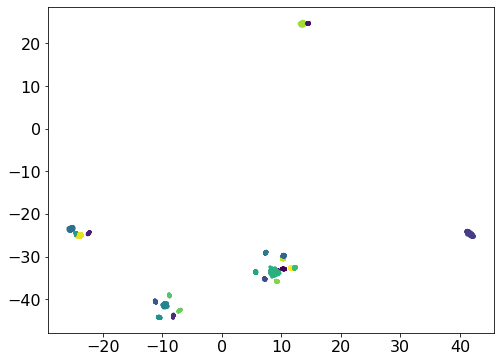

In [60]:
kmeans=KMeans(n_clusters=23)
kmeans.fit(CBA)
plt.scatter(CBA[:,0], CBA[:,1],s=6, c=kmeans.labels_)
xba = kmeans.cluster_centers_
xba

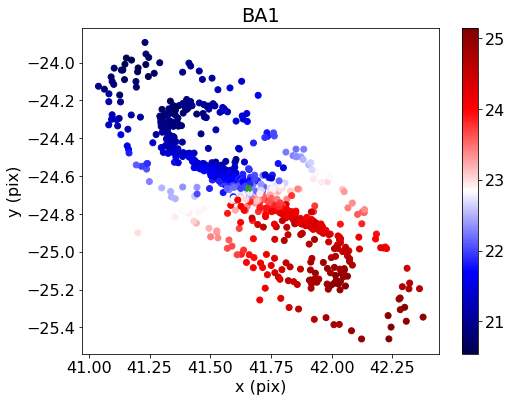

In [61]:
centre = (41.65401492, -24.66319513)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba1 = backstars[d<7] # filter to only close ones
plt.scatter(galaxyba1.X,galaxyba1.Y,c=galaxyba1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA1');

#find rotation curve
#semi major and semi minor axes rv vs position along semi major

#no stellar masses
#cdf of stars as function of distance in curve, enclosed mass (kelper 3rd or virial theorem), either dark matter or black hole
#lots of mass in origin is black hole
#black hole makes stars travel fast around it due to gravitational pull

8912.509381337459

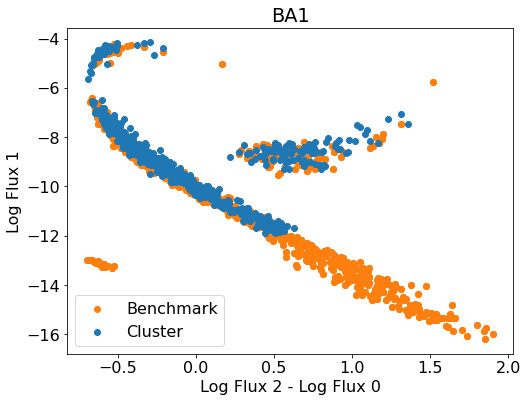

In [62]:
m0, m1, m2 = (np.log10(galaxyba1['BlueF']), 
              np.log10(galaxyba1['GreenF']), 
              np.log10(galaxyba1['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+7.9,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA1')
10**(7.9/2)



In [63]:
#galaxyba1

In [64]:
import sys
print(sys.version)
import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt

from tqdm import tqdm # tqdm is a package that lets you make progress bars to see how a loop is going

import os 

import pandas as pd # pandas is a popular library in industry for manipulating large data tables

from astropy.timeseries import LombScargle

# configure notebook for plotting
%matplotlib inline

# mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme

# subsequent lines default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)   
matplotlib.rcParams['font.size']=16              
matplotlib.rcParams['savefig.dpi']= 300             

import warnings
warnings.filterwarnings('ignore')

3.9.18 (main, Sep 11 2023, 08:38:23) 
[Clang 14.0.6 ]


In [67]:
#import variable star data
ddir_stars = '/Users/eleanor/Downloads/universe_2/' # point this to where you unzip your data!

ddir = ddir_stars + 'Variable_Star_Data/'


In [69]:
fname = 'BackS131470.csv' # put your filename here
#fname = 'FrontS036691.csv' # put your filename here

data = pd.read_csv(ddir+fname) # load in CSV data as a Pandas object
print(data.keys()) # see what's in it
time, flux = data.Time, data.NormalisedFlux # just extract the columns as variables
dt = np.median(np.diff(time))
print('Nyquist Limit',0.5/dt,'cycles per hour') # can't get frequencies higher than the Nyquist limit

Index(['Time', 'NormalisedFlux'], dtype='object')
Nyquist Limit 0.5 cycles per hour


In [70]:
LS = LombScargle(time,flux) # initialize a Lomb-Scargle algorithm from Astropy
freqs = np.linspace(1/100,0.45,10000) # frequency grid shouldn't go higher than Nyquist limit
power = LS.power(freqs) # calculate LS power

In [71]:
import glob # this package lets you search for filenames

fnames = glob.glob(ddir+'*.csv')

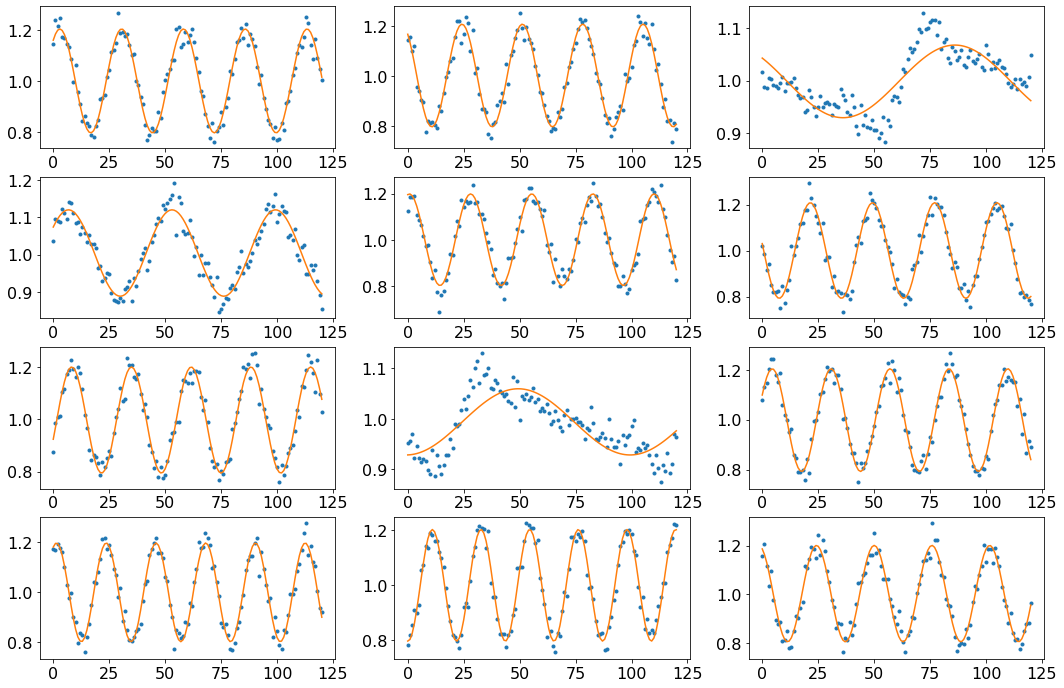

In [72]:
freqs = np.linspace(1/100,0.49,10000) # frequency grid shouldn't go higher than Nyquist limit
periods = [] # start an empty list to hold the period 

fig, axes = plt.subplots(4,3,figsize=(18,12))
# for fname, ax in zip(fnames[:12], axes.ravel()): # you can loop over two things
for fname, ax in zip(fnames, axes.ravel()): # you can loop over two things
    data = pd.read_csv(fname) # load in CSV data as a Pandas object

    time, flux = data.Time, data.NormalisedFlux # just extract the columns as variables

    LS = LombScargle(time,flux) # initialize a Lomb-Scargle
    power = LS.power(freqs) # calculate LS power 
    bestfreq = freqs[np.argmax(power)] # which frequency has the highest Lomb-Scargle power?
    
    pred = LS.model(time,bestfreq) # make a sine wave prediction at the best frequency
    ax.plot(time,flux,'.')
    ax.plot(time,pred) # plot the model over the data
    
    periods.append(1/bestfreq) # add each period to the list
    
periods = np.array(periods) # turn it from a list to an array

In [73]:
freqs = np.linspace(1/100,0.45,10000) # frequency grid shouldn't go higher than Nyquist limit
periods = [] # start an empty list to hold the period 
names = []

for fname in tqdm(fnames): # tqdm is a package that gives you a progress bar - neat! 
    data = pd.read_csv(fname) # load in CSV data as a Pandas object

    time, flux = data.Time, data.NormalisedFlux # just extract the columns as variables

    LS = LombScargle(time,flux) # initialize a Lomb-Scargle
    power = LS.power(freqs) # calculate LS power 
    bestfreq = freqs[np.argmax(power)] # which frequency has the highest Lomb-Scargle power?
    
    pred = LS.model(time,bestfreq) # make a sine wave prediction at the best frequency
    
    periods.append(1/bestfreq) # add each period to the list
    names.append(os.path.basename(fname).strip('.csv')) # os.path.basename gets rid of directories and gives you the filename; then we strip '.csv'
    
periods = np.array(periods) # turn it from a list to an array

100%|██████████████████████████████████████| 7085/7085 [00:54<00:00, 129.65it/s]


In [74]:
import glob # this package lets you search for filenames
import os

variables = pd.DataFrame({'Name':names,'Period':periods}) # you can turn a dictionary into a dataframe like this
# variables.Name = variables.Name.astype('|S') # have to do this so that it knows the names are strings
variables.Name = variables.Name.astype('string') 

In [75]:
vargalaxyba1=galaxyba1[galaxyba1['Variable?']==1]
#print(np.shape(vargalaxyba1))
#print(vargalaxyba1)
#print(bytes('BackS141889','utf-8'))
#print()

In [76]:
vargalaxyba1P=pd.merge(galaxyba1,variables,on='Name')
vargalaxyba1P.head()

Name        X        Y         BlueF        GreenF          RedF  \
0  BackS141889  41.7002 -24.6798  8.289000e-13  6.917000e-13  3.484000e-13   
1  BackS142010  41.7346 -24.7190  3.412000e-17  8.825000e-17  4.451000e-16   
2  BackS142145  41.6407 -24.5254  1.567000e-16  3.795000e-16  1.689000e-15   
3  BackS142177  41.7519 -24.7701  2.488000e-16  6.973000e-16  4.230000e-15   
4  BackS142186  41.5726 -24.6223  8.640000e-13  6.550000e-13  2.718000e-13   

   Parallax  RadialVelocity  Variable?      Period  
0       0.0           22.39          1   41.374602  
1       0.0           23.44          1  100.000000  
2      -0.0           21.34          1  100.000000  
3      -0.0           23.94          1   92.660550  
4      -0.0           21.55          1   41.525811

In [77]:
m0, m1, m2 = np.log10(galaxyba1['BlueF']), np.log10(galaxyba1['GreenF']), np.log10(galaxyba1['RedF']) 
colour = m2-m0
abs_mag = m1 + 2*np.log10(1./galaxyba1.Parallax) 

v0, v1, v2 = np.log10(vargalaxyba1P['BlueF']), np.log10(vargalaxyba1P['GreenF']), np.log10(vargalaxyba1P['RedF']) 
variable_colour = v2-v0
abs_mag_v = v1 + 2*np.log10(1./vargalaxyba1P.Parallax)

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

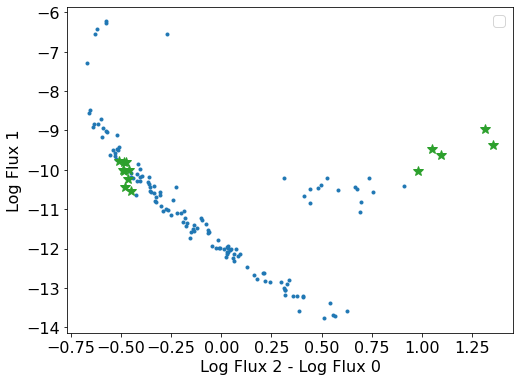

In [78]:
s = plt.plot(colour,abs_mag,'.C0')
h = plt.plot(variable_colour,abs_mag_v,'.C2',marker='*',markersize=10)

    
plt.legend([s, h],['Steady','Variable'])
plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

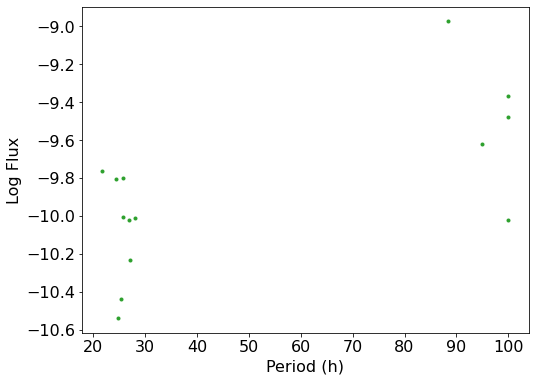

In [79]:
###this doesnt work nicely
##working in period luminosity notebook
plt.plot(vargalaxyba1P.Period,abs_mag_v,'.',color='C2')
plt.xlabel('Period (h)')
plt.ylabel('Log Flux');

In [80]:
#plt.plot(vargalaxyba1P.Period,abs_mag_v,'.',color='C2')
#vargalaxyba1P.Period=vargalaxyba1P.Period[(vargalaxyba1P.Period<40)]
#abs_mag_v=vargalaxyba1P.Period[(vargalaxyba1P.Period<40)]
#plt.xlabel('Period (h)')
#plt.ylabel('Log Flux');

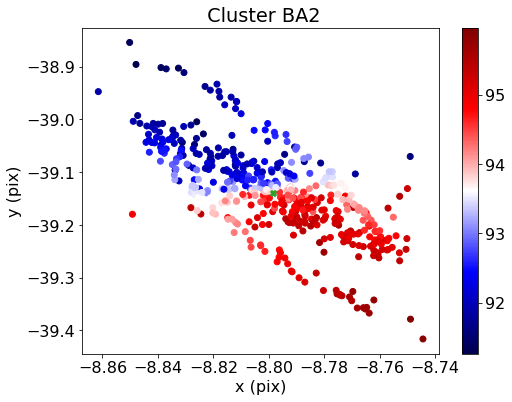

In [81]:
centre = (-8.79838502, -39.139264351)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba2 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba2.X,galaxyba2.Y,c=galaxyba2.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title(' Cluster BA2');


25118.864315095823

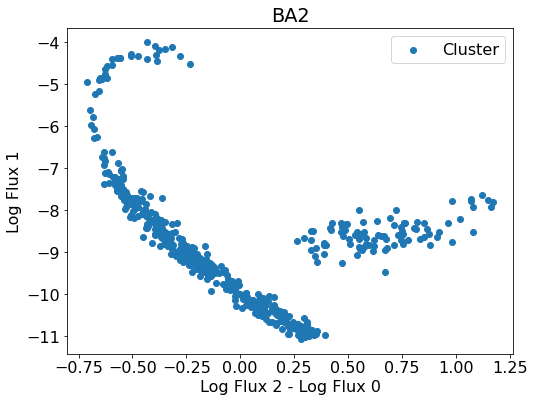

In [82]:
m0, m1, m2 = (np.log10(galaxyba2['BlueF']), 
              np.log10(galaxyba2['GreenF']), 
              np.log10(galaxyba2['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.8,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA2')
10**(8.8/2)

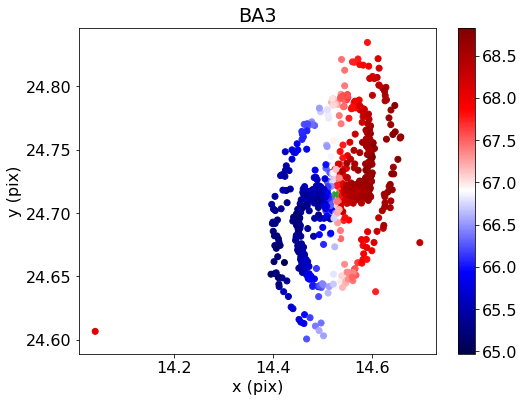

In [83]:
centre = (14.52497384,  24.71534616)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba3 = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba3.X,galaxyba3.Y,c=galaxyba3.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA3');


25118.864315095823

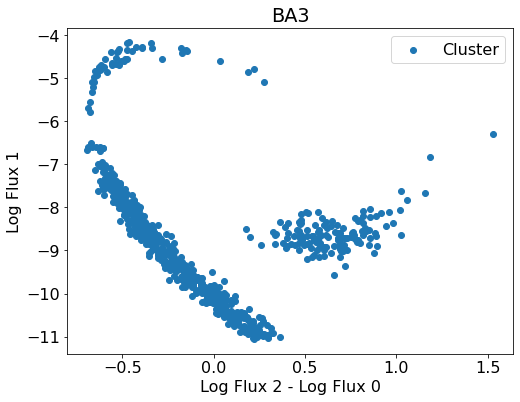

In [84]:
m0, m1, m2 = (np.log10(galaxyba3['BlueF']), 
              np.log10(galaxyba3['GreenF']), 
              np.log10(galaxyba3['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.8,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA3')
10**(8.8/2)

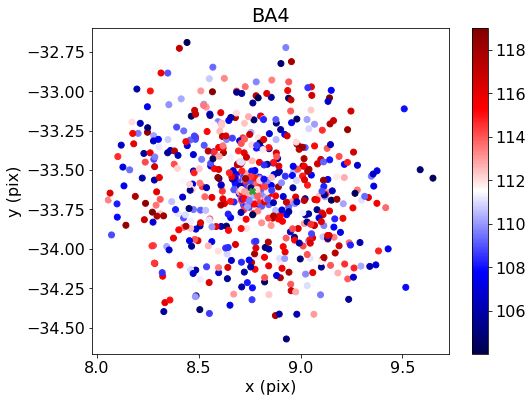

In [85]:
centre = (8.76339623, -33.63173543)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba4 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba4.X,galaxyba4.Y,c=galaxyba4.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA4');


22387.21138568338

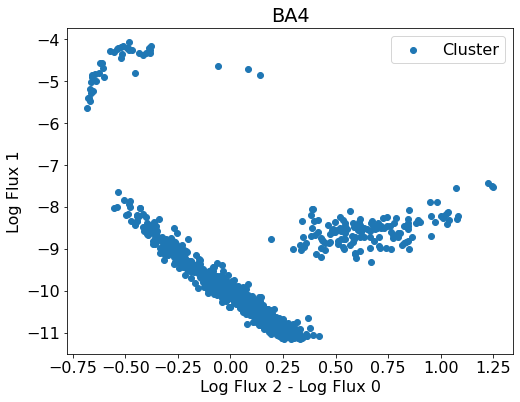

In [86]:
m0, m1, m2 = (np.log10(galaxyba4['BlueF']), 
              np.log10(galaxyba4['GreenF']), 
              np.log10(galaxyba4['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA4')
10**(8.7/2)

Text(0.5, 1.0, 'BA5a')

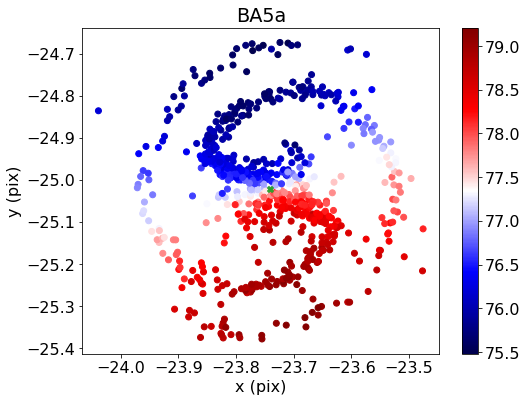

In [87]:
centre = (-23.7411227 , -25.02280837)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba5a = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba5a.X,galaxyba5a.Y,c=galaxyba5a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA5a')


11220.18454301963

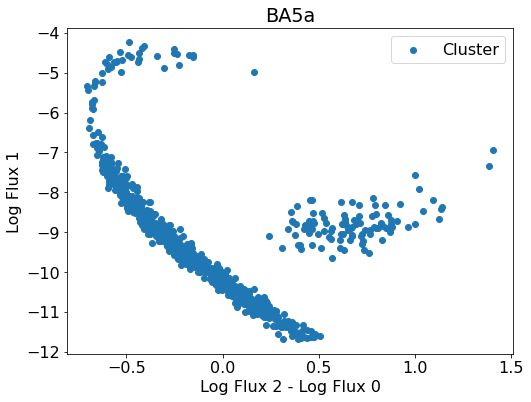

In [88]:
m0, m1, m2 = (np.log10(galaxyba5a['BlueF']), 
              np.log10(galaxyba5a['GreenF']), 
              np.log10(galaxyba5a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.1,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA5a')
10**(8.1/2)

Text(0.5, 1.0, 'BA5b')

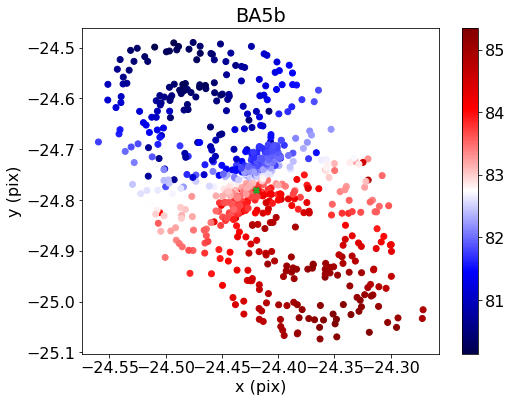

In [89]:
centre = (-24.42 , -24.78)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba5b = backstars[d<0.3] # filter to only close ones
plt.scatter(galaxyba5b.X,galaxyba5b.Y,c=galaxyba5b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA5b')

12589.254117941662

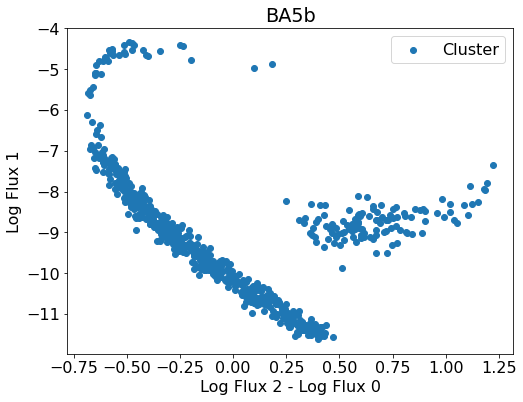

In [90]:
m0, m1, m2 = (np.log10(galaxyba5b['BlueF']), 
              np.log10(galaxyba5b['GreenF']), 
              np.log10(galaxyba5b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.2,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA5b')
10**(8.2/2)

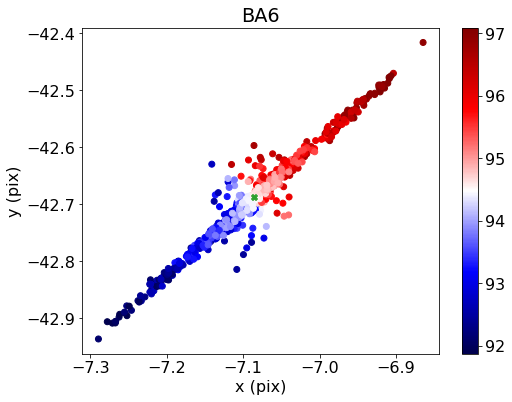

In [91]:
centre = (-7.08522101, -42.68815294)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba6 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba6.X,galaxyba6.Y,c=galaxyba6.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA6');


22387.21138568338

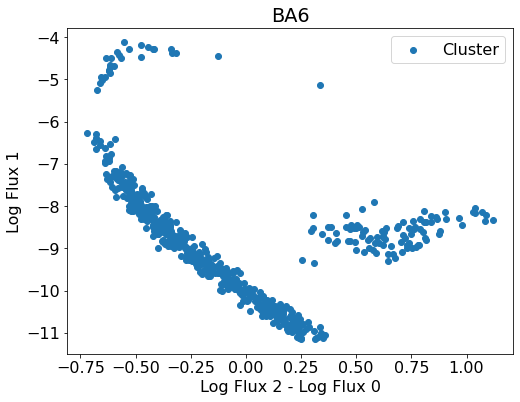

In [92]:
m0, m1, m2 = (np.log10(galaxyba6['BlueF']), 
              np.log10(galaxyba6['GreenF']), 
              np.log10(galaxyba6['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA6')
10**(8.7/2)

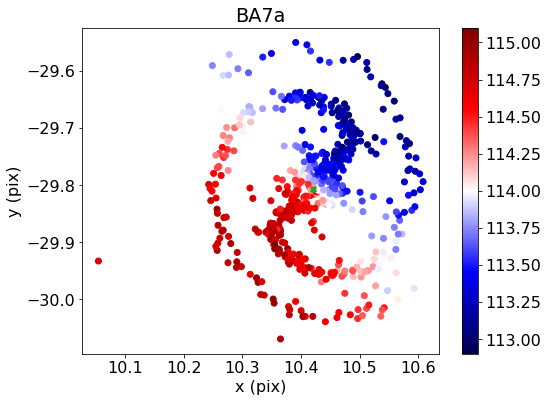

In [93]:
centre = (10.42071839, -29.80672286)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba7a = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba7a.X,galaxyba7a.Y,c=galaxyba7a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA7a');


19952.62314968879

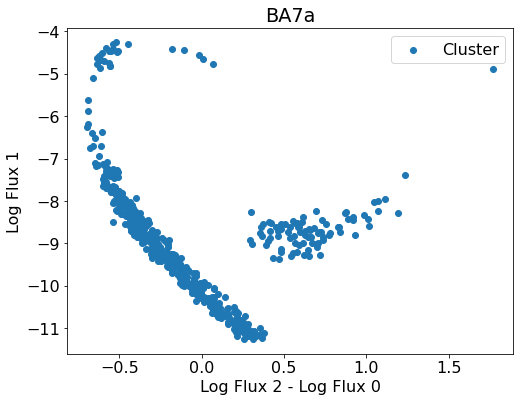

In [94]:
m0, m1, m2 = (np.log10(galaxyba7a['BlueF']), 
              np.log10(galaxyba7a['GreenF']), 
              np.log10(galaxyba7a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA7a')
10**(8.6/2)

Text(0.5, 1.0, 'BA7b')

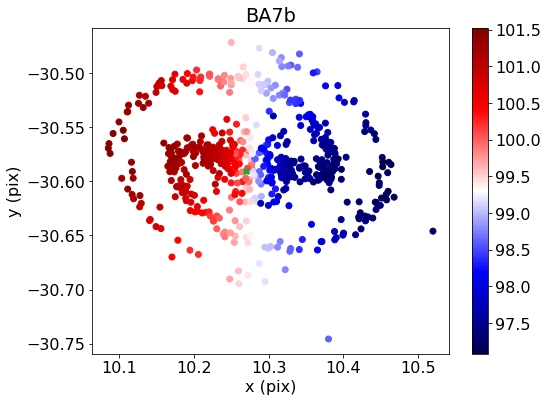

In [95]:
centre = (10.27 , -30.59)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba7b = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba7b.X,galaxyba7b.Y,c=galaxyba7b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA7b')

19952.62314968879

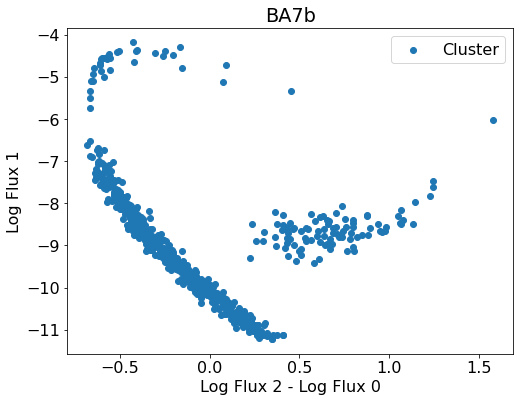

In [96]:
m0, m1, m2 = (np.log10(galaxyba7b['BlueF']), 
              np.log10(galaxyba7b['GreenF']), 
              np.log10(galaxyba7b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA7b')
10**(8.6/2)

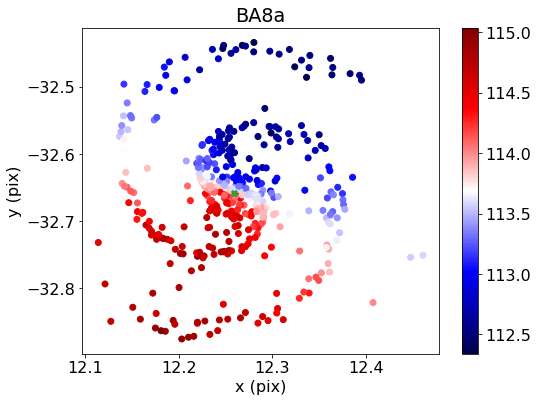

In [97]:
centre = (12.25934408, -32.65742111)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba8a = backstars[d<0.3] # filter to only close ones
plt.scatter(galaxyba8a.X,galaxyba8a.Y,c=galaxyba8a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA8a');


19952.62314968879

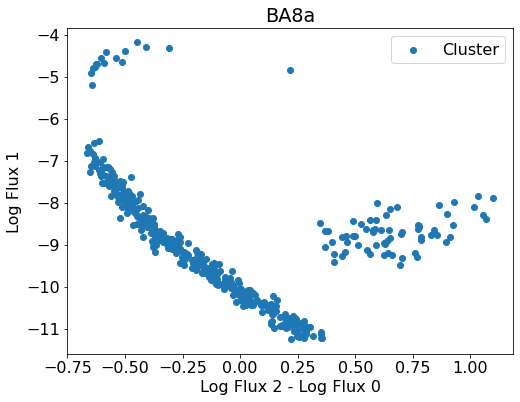

In [98]:
m0, m1, m2 = (np.log10(galaxyba8a['BlueF']), 
              np.log10(galaxyba8a['GreenF']), 
              np.log10(galaxyba8a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA8a')
10**(8.6/2)

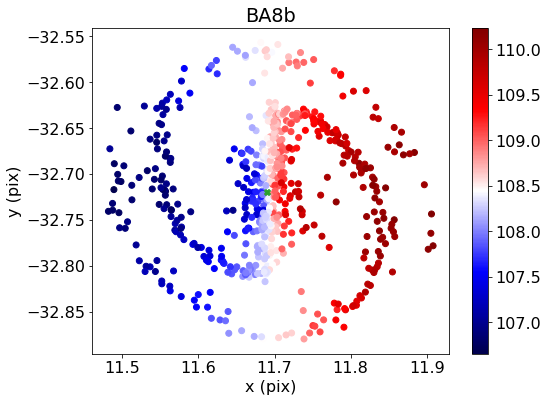

In [99]:
centre = (11.69, -32.72)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba8b = backstars[d<0.3] # filter to only close ones
plt.scatter(galaxyba8b.X,galaxyba8b.Y,c=galaxyba8b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA8b');

17782.794100389227

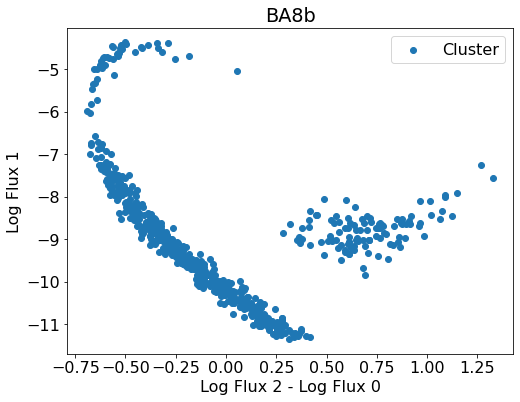

In [100]:
m0, m1, m2 = (np.log10(galaxyba8b['BlueF']), 
              np.log10(galaxyba8b['GreenF']), 
              np.log10(galaxyba8b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA8b')
10**(8.5/2)

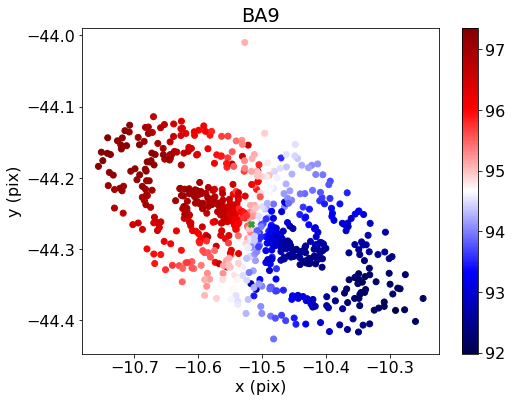

In [101]:
centre = (-10.51791533, -44.26506245)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba9 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba9.X,galaxyba9.Y,c=galaxyba9.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA9');


22387.21138568338

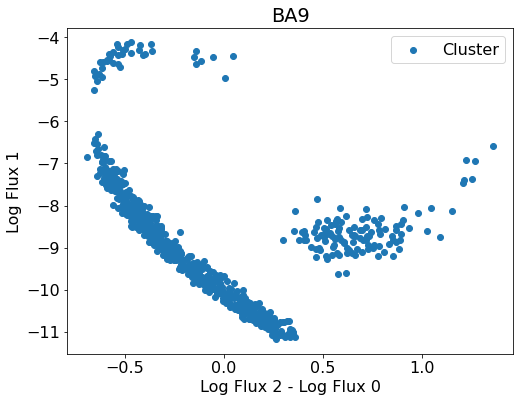

In [102]:
m0, m1, m2 = (np.log10(galaxyba9['BlueF']), 
              np.log10(galaxyba9['GreenF']), 
              np.log10(galaxyba9['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA9')
10**(8.7/2)

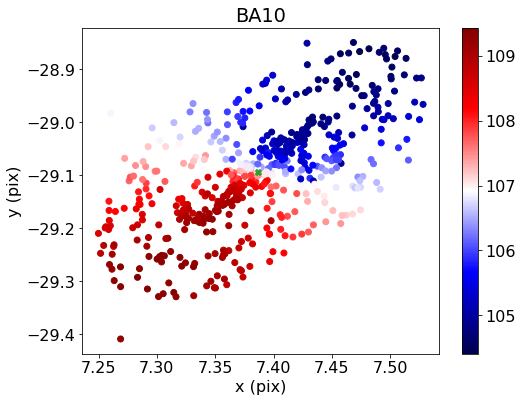

In [103]:
centre = (7.38684234, -29.09425255)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba10 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba10.X,galaxyba10.Y,c=galaxyba10.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA10');


Text(0.5, 1.0, 'BA10')

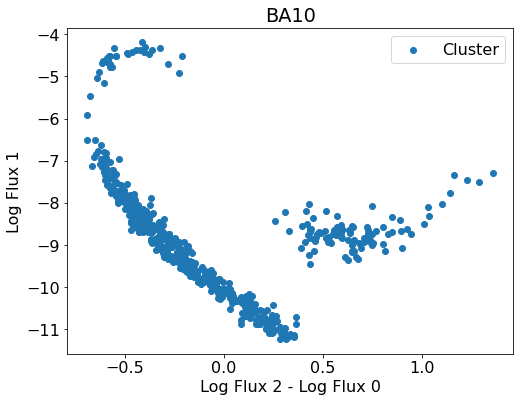

In [104]:
m0, m1, m2 = (np.log10(galaxyba10['BlueF']), 
              np.log10(galaxyba10['GreenF']), 
              np.log10(galaxyba10['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA10')

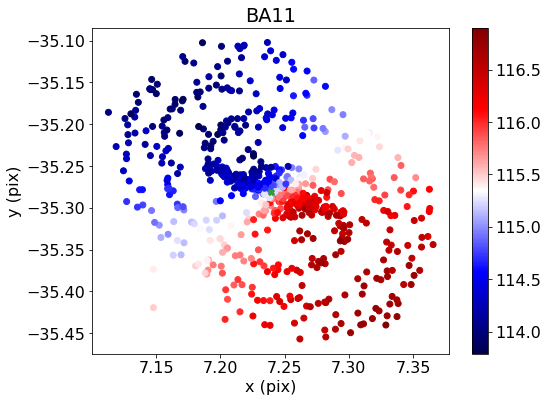

In [105]:
centre = (7.23939239, -35.28150299)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba11 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba11.X,galaxyba11.Y,c=galaxyba11.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA11');


Text(0.5, 1.0, 'BA11')

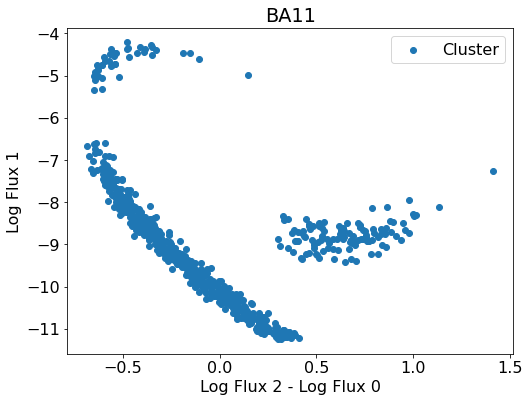

In [106]:
m0, m1, m2 = (np.log10(galaxyba11['BlueF']), 
              np.log10(galaxyba11['GreenF']), 
              np.log10(galaxyba11['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA11')

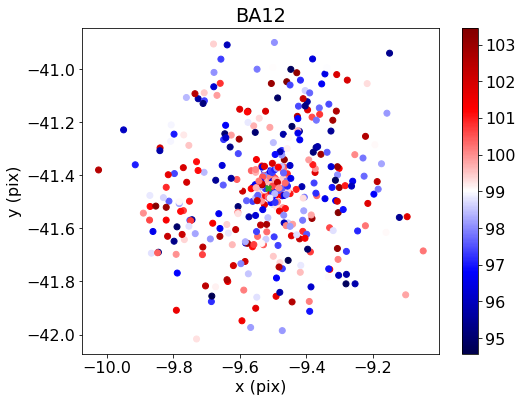

In [107]:
centre = (-9.51475882, -41.44602602)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba12 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba12.X,galaxyba12.Y,c=galaxyba12.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA12');


Text(0.5, 1.0, 'BA12')

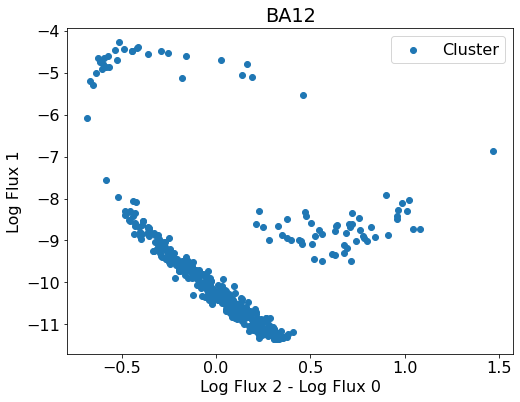

In [108]:
m0, m1, m2 = (np.log10(galaxyba12['BlueF']), 
              np.log10(galaxyba12['GreenF']), 
              np.log10(galaxyba12['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA12')

Text(0.5, 1.0, 'BA13')

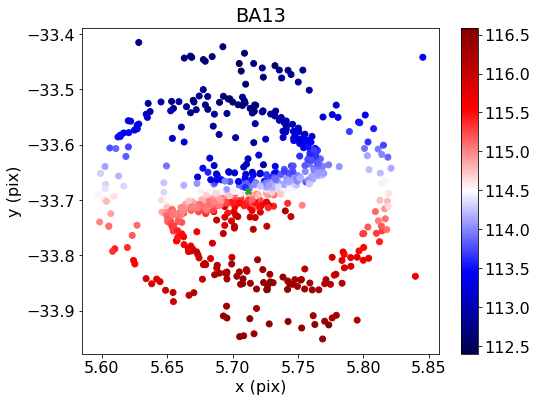

In [109]:
centre = (5.71196328, -33.68406677)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba13 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba13.X,galaxyba13.Y,c=galaxyba13.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA13')

19952.62314968879

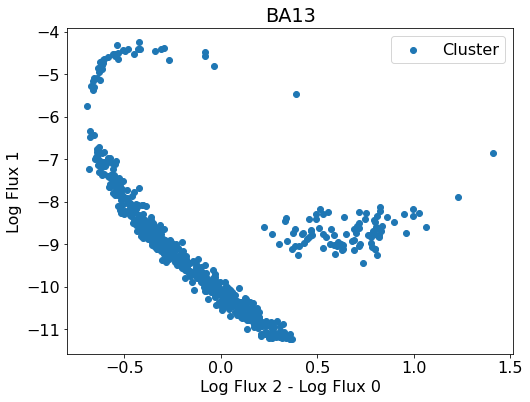

In [110]:
m0, m1, m2 = (np.log10(galaxyba13['BlueF']), 
              np.log10(galaxyba13['GreenF']), 
              np.log10(galaxyba13['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA13')
10**(8.6/2)

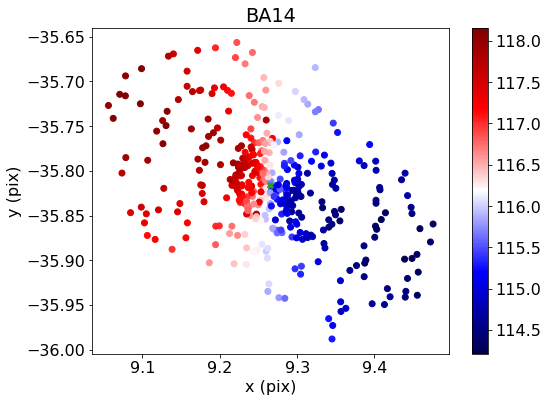

In [111]:
centre = (9.26548462, -35.81633573)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba14 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba14.X,galaxyba14.Y,c=galaxyba14.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA14');


17782.794100389227

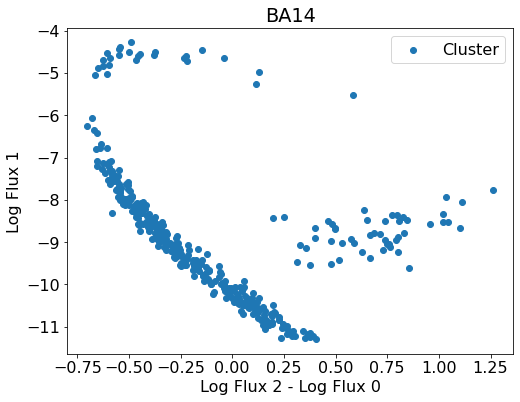

In [112]:
m0, m1, m2 = (np.log10(galaxyba14['BlueF']), 
              np.log10(galaxyba14['GreenF']), 
              np.log10(galaxyba14['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA14')
10**(8.5/2)

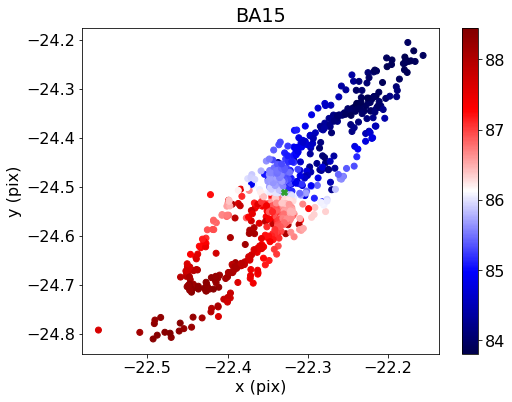

In [113]:
centre = (-22.32923073, -24.51114134)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba15 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba15.X,galaxyba15.Y,c=galaxyba15.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA15');

11220.18454301963

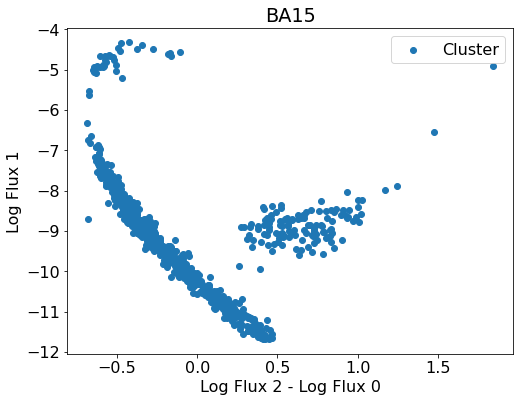

In [114]:
m0, m1, m2 = (np.log10(galaxyba15['BlueF']), 
              np.log10(galaxyba15['GreenF']), 
              np.log10(galaxyba15['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.1,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA15')
10**(8.1/2)

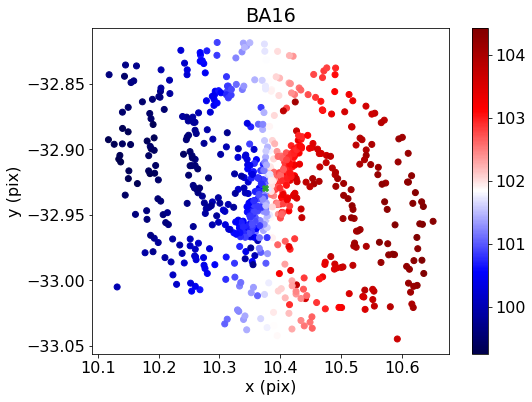

In [115]:
centre = (10.37419578, -32.92942329)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba16 = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba16.X,galaxyba16.Y,c=galaxyba16.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA16');

22387.21138568338

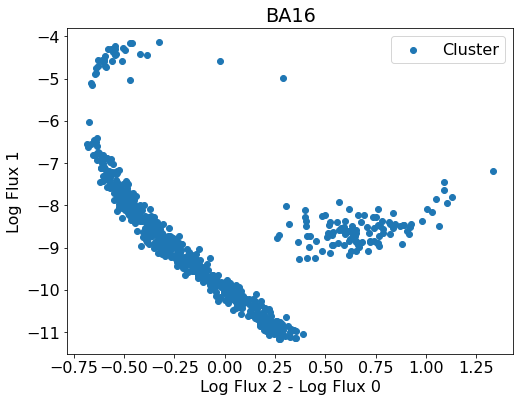

In [116]:
m0, m1, m2 = (np.log10(galaxyba16['BlueF']), 
              np.log10(galaxyba16['GreenF']), 
              np.log10(galaxyba16['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA16')
10**(8.7/2)

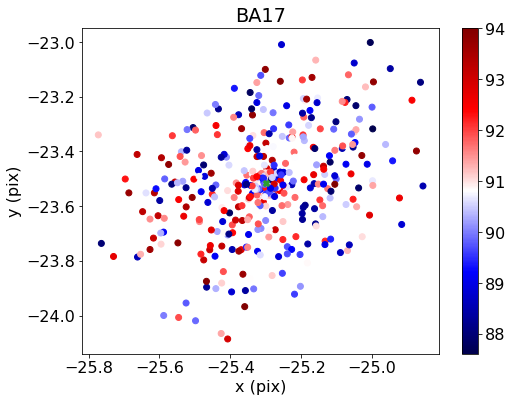

In [117]:
centre = (-25.29921244, -23.51684139)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba17 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba17.X,galaxyba17.Y,c=galaxyba17.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA17');

14125.375446227554

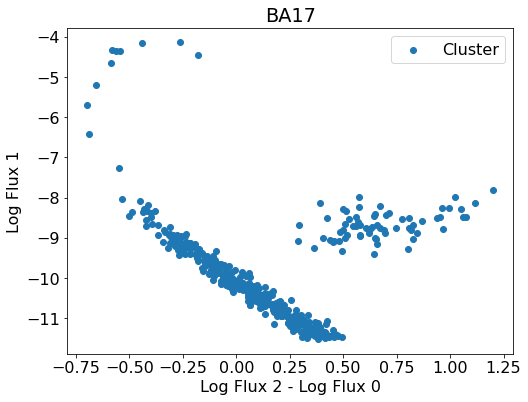

In [118]:
m0, m1, m2 = (np.log10(galaxyba17['BlueF']), 
              np.log10(galaxyba17['GreenF']), 
              np.log10(galaxyba17['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.3,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA17')
10**(8.3/2)

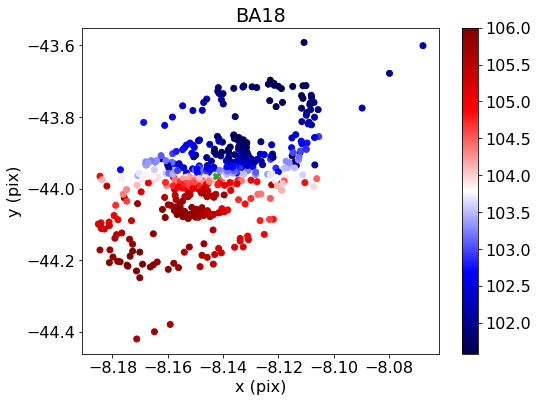

In [119]:
centre = (-8.14270442, -43.96367691)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba18 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba18.X,galaxyba18.Y,c=galaxyba18.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA18');

19952.62314968879

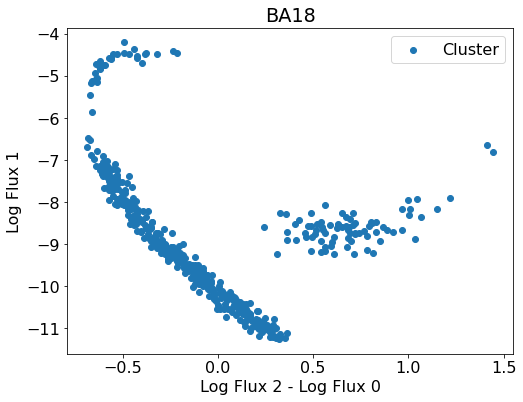

In [120]:
m0, m1, m2 = (np.log10(galaxyba18['BlueF']), 
              np.log10(galaxyba18['GreenF']), 
              np.log10(galaxyba18['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA18')
10**(8.6/2)

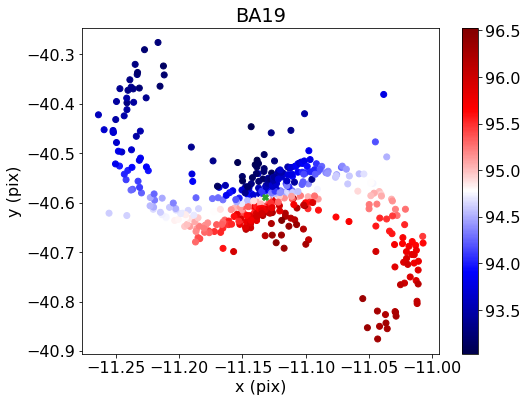

In [121]:
centre = (-11.13208013, -40.58794292)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba19 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba19.X,galaxyba19.Y,c=galaxyba19.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA19');

19952.62314968879

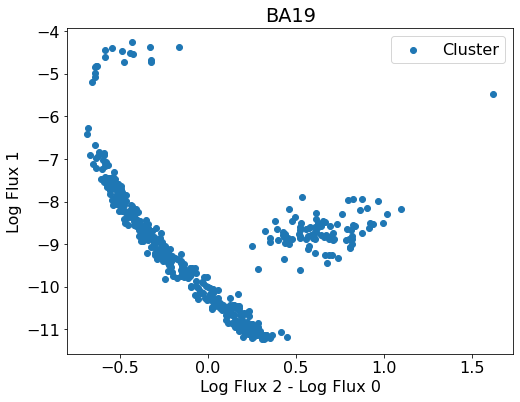

In [122]:
m0, m1, m2 = (np.log10(galaxyba19['BlueF']), 
              np.log10(galaxyba19['GreenF']), 
              np.log10(galaxyba19['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA19')
10**(8.6/2)

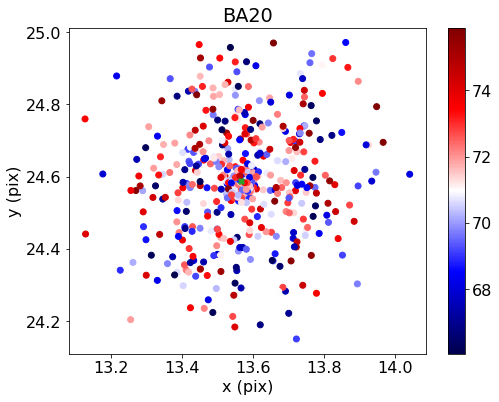

In [123]:
centre = (13.56565183,  24.58746981)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba20 = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba20.X,galaxyba20.Y,c=galaxyba20.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA20');

28183.82931264455

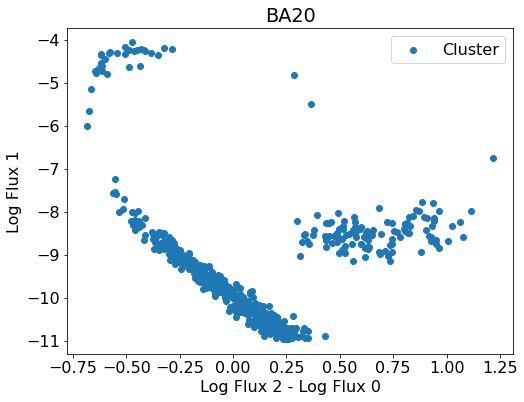

In [124]:
m0, m1, m2 = (np.log10(galaxyba20['BlueF']), 
              np.log10(galaxyba20['GreenF']), 
              np.log10(galaxyba20['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.9,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA20')
10**(8.9/2)

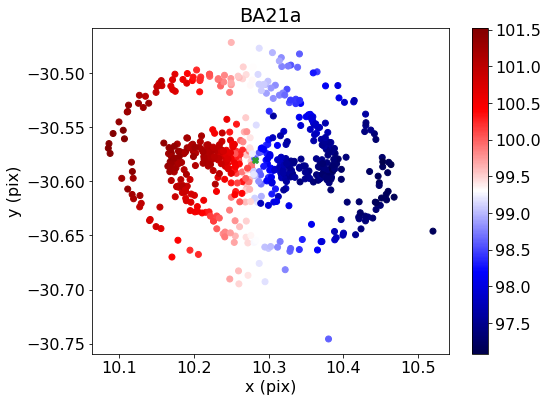

In [125]:
centre = (10.28218743, -30.58019354)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba21a = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba21a.X,galaxyba21a.Y,c=galaxyba21a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA21a');

17782.794100389227

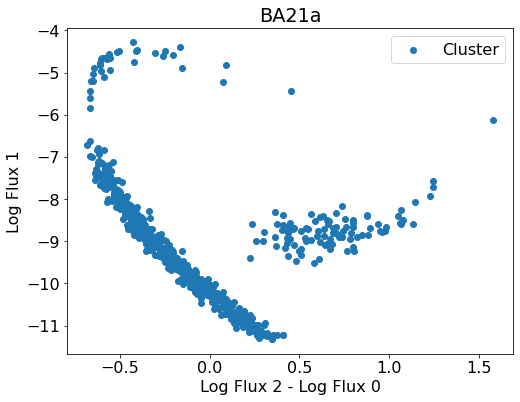

In [126]:
m0, m1, m2 = (np.log10(galaxyba21a['BlueF']), 
              np.log10(galaxyba21a['GreenF']), 
              np.log10(galaxyba21a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA21a')
10**(8.5/2)

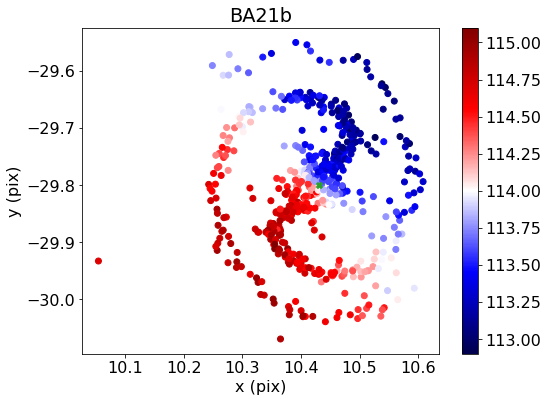

In [127]:
centre = (10.43, -29.8)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba21b = backstars[d<0.4] # filter to only close ones
plt.scatter(galaxyba21b.X,galaxyba21b.Y,c=galaxyba21b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA21b');

17782.794100389227

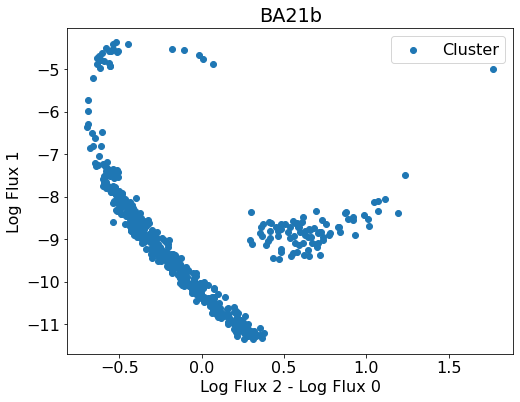

In [128]:
m0, m1, m2 = (np.log10(galaxyba21b['BlueF']), 
              np.log10(galaxyba21b['GreenF']), 
              np.log10(galaxyba21b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA21b')
10**(8.5/2)

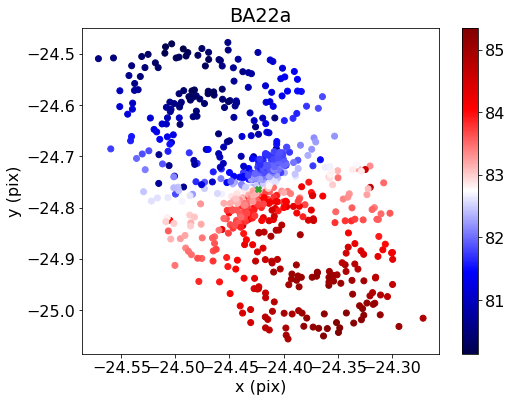

In [129]:
centre = (-24.42321423, -24.76371036)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba22a = backstars[d<0.3] # filter to only close ones
plt.scatter(galaxyba22a.X,galaxyba22a.Y,c=galaxyba22a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA22a');

11220.18454301963

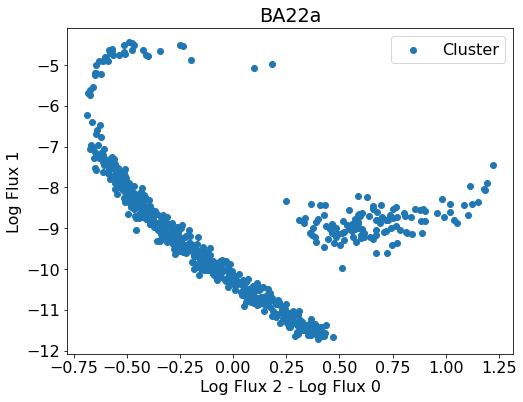

In [130]:
m0, m1, m2 = (np.log10(galaxyba22a['BlueF']), 
              np.log10(galaxyba22a['GreenF']), 
              np.log10(galaxyba22a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.1,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA22a')
10**(8.1/2)

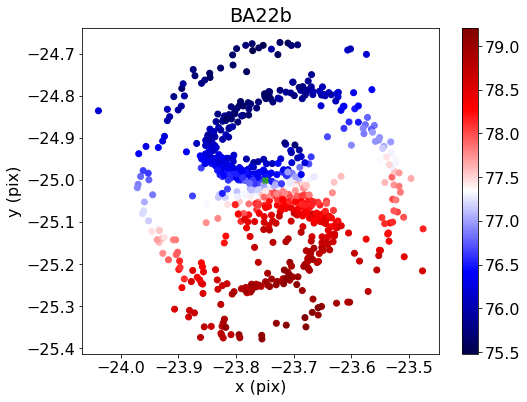

In [131]:
centre = (-23.75, -25)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba22b = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba22b.X,galaxyba22b.Y,c=galaxyba22b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA22b');

14125.375446227554

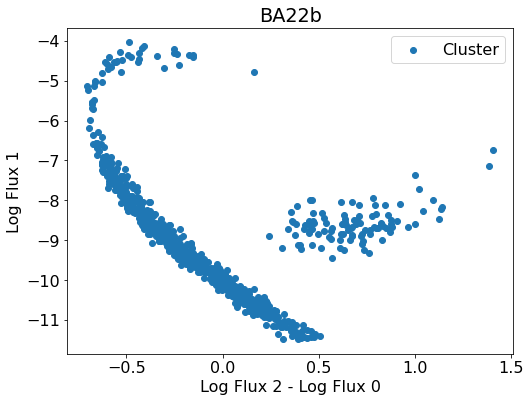

In [132]:
m0, m1, m2 = (np.log10(galaxyba22b['BlueF']), 
              np.log10(galaxyba22b['GreenF']), 
              np.log10(galaxyba22b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.3,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA22b')
10**(8.3/2)

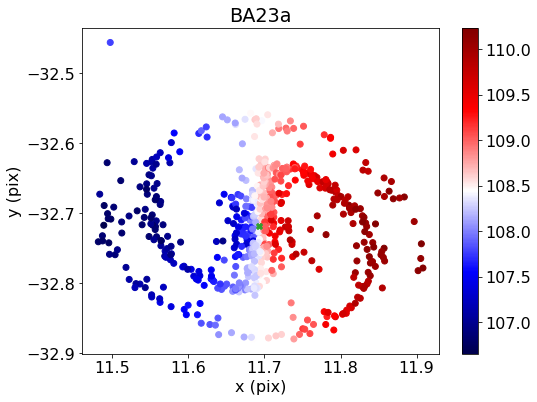

In [133]:
centre = (11.69323639, -32.71761962)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba23a = backstars[d<0.4] # filter to only close ones
plt.scatter(galaxyba23a.X,galaxyba23a.Y,c=galaxyba23a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA23a');

19952.62314968879

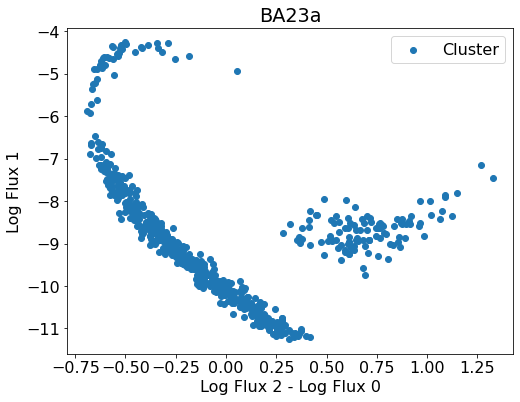

In [134]:
m0, m1, m2 = (np.log10(galaxyba23a['BlueF']), 
              np.log10(galaxyba23a['GreenF']), 
              np.log10(galaxyba23a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA23a')
10**(8.6/2)

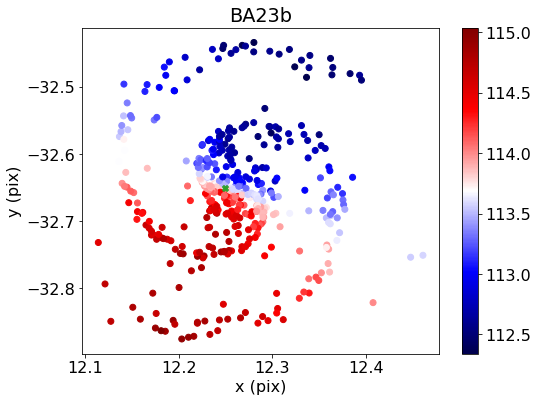

In [135]:
centre = (12.25, -32.65)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba23b = backstars[d<0.3] # filter to only close ones
plt.scatter(galaxyba23b.X,galaxyba23b.Y,c=galaxyba23b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA23b');

19952.62314968879

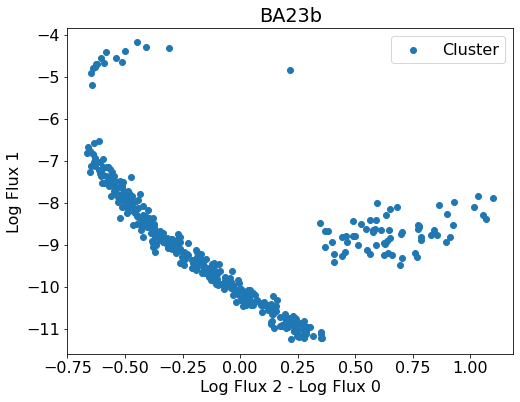

In [136]:
m0, m1, m2 = (np.log10(galaxyba23b['BlueF']), 
              np.log10(galaxyba23b['GreenF']), 
              np.log10(galaxyba23b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA23b')
10**(8.6/2)